## IMPORT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support



## 1. PREPARAZIONE DEL DATASET

### 1.1 CARICO E PREPROCESSO I DATI SUI FRUTTI ESOTICI

In [ ]:
URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/"

# Carico il dataset
df_fruits = pd.read_csv( URL + "fruits.csv")

df_fruits.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


### 1.2 ANALISI ESPLORATIVA DEI DATI

         Peso (g)  Diametro medio (mm)  Lunghezza media (mm)  \
count  500.000000           500.000000            500.000000   
mean    47.313440            86.573100              5.298620   
std     26.768797            64.293403              2.641993   
min      8.570000             7.530000              1.150000   
25%     24.797500            50.510000              2.672500   
50%     42.380000            70.450000              5.670000   
75%     68.080000            88.852500              7.455000   
max    111.210000           299.890000             11.140000   

       Durezza buccia (1-10)  Dolcezza (1-10)  
count             500.000000       500.000000  
mean                7.437640         3.593220  
std                 1.812548         1.264899  
min                 3.070000         1.250000  
25%                 6.152500         2.570000  
50%                 7.340000         3.535000  
75%                 8.615000         4.465000  
max                13.720000         6.

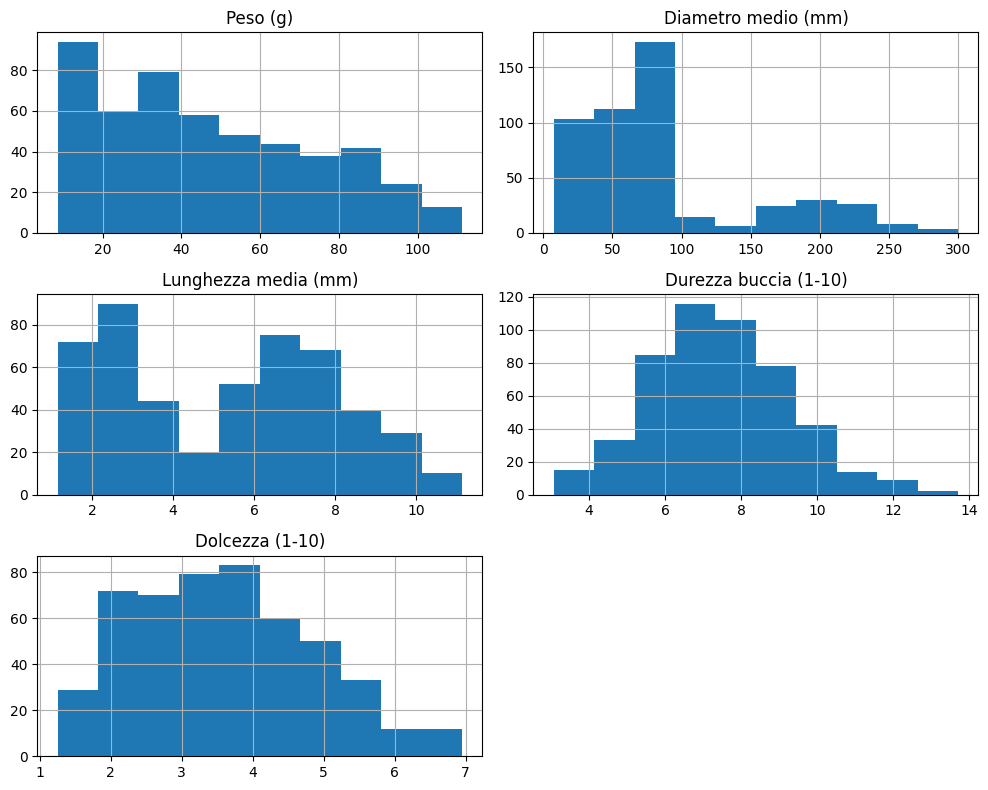

In [ ]:
# Statistiche descrittive
print(df_fruits.describe())
print(df_fruits.info())
print(df_fruits.shape)

# Controllo dei valori mancanti
print(df_fruits.isnull().sum())

# Istogramma per ogni variabile
df_fruits.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### 1.3 GESTIONE DI EVENTUALI MANCANTI, SCALATURA DEI DATI

In [ ]:
# Gestisco i mancanti (ma nella parte di esplorativa dei dati ho già constatato
# che non ci sono valori mancanti)

df_fruits.dropna(inplace=True)
df_fruits.shape

(500, 6)

In [ ]:
# Effettuo la scalatura dei dati: seleziono le colonne da scalare
features = ['Peso (g)', 'Diametro medio (mm)', 'Lunghezza media (mm)', 'Durezza buccia (1-10)', 'Dolcezza (1-10)']

# Utilizza StandardScaler
scaler = StandardScaler()
df_fruits[features] = scaler.fit_transform(df_fruits[features])

df_fruits.shape

(500, 6)

## 2. IMPLEMENTAZIONE DEL MODELLO KNN

### 2.1 SVILUPPO E ADDESTRAMENTO DEL MODELLO KNN

In [ ]:
# Definiamo le caratteristiche (features) e la variabile di destinazione (target)
features = ['Peso (g)', 'Diametro medio (mm)', 'Lunghezza media (mm)', 'Durezza buccia (1-10)', 'Dolcezza (1-10)']
X = df_fruits[features]  # Caratteristiche
y = df_fruits['Frutto']  # Variabile di destinazione

# Suddivido i dati in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ADDESTRAMENTO DEL MODELLO

# InizializzO il modello KNN con un numero di vicini iniziale
knn = KNeighborsClassifier(n_neighbors=5)

# Addestro il modello sui dati di addestramento
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 2.2 OTTIMIZZO I PARAMETRI PER MIGLIORARE ACCURATEZZA PREDITTIVA

In [ ]:
# Definisco i parametri da testare
param_grid = {'n_neighbors': range(1, 21)}

# Uso GridSearchCV per ottimizzare il numero di vicini
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Trova il miglior numero di vicini
best_k = grid_search.best_params_['n_neighbors']
print(f"Miglior numero di vicini: {best_k}")

# Addestro nuovamente il modello con il miglior numero di vicini
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

Miglior numero di vicini: 11


KNeighborsClassifier(n_neighbors=11)

## 3. VALUTAZIONE DELLE PERFORMANCE

### 3.1 UTILIZZO DI TECNICHE DI VALIDAZIONE INCROCIATA PER VALUTARE LA CAPACITà DI GENERALIZZAZIONE DEL MODELLO

In [ ]:
# Eseguo la validazione incrociata con 5 folds
cv_scores = cross_val_score(knn_best, X, y, cv=5, scoring='accuracy')

# Calcolo l'accuratezza media e la deviazione standard
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Accuratezza media della validazione incrociata: {cv_mean:.2f} ± {cv_std:.2f}")

Accuratezza media della validazione incrociata: 0.91 ± 0.02


### 3.2 CALCOLO DELLE METRICHE DI PERFORMANCE

In [ ]:
# Effettuo la previsione sui dati di test
y_pred = knn_best.predict(X_test)

# Calcolo l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza sul set di test: {accuracy:.2f}")

# Calcolo la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice di confusione:\n", conf_matrix)

# Calcolo il rapporto di classificazione
class_report = classification_report(y_test, y_pred)
print("Rapporto di classificazione:\n", class_report)

Accuratezza sul set di test: 0.89
Matrice di confusione:
 [[ 7  0  2  1  0]
 [ 0 14  0  0  0]
 [ 3  0 20  1  0]
 [ 4  0  0 24  0]
 [ 0  0  0  0 24]]
Rapporto di classificazione:
               precision    recall  f1-score   support

     Arancia       0.50      0.70      0.58        10
      Banana       1.00      1.00      1.00        14
        Kiwi       0.91      0.83      0.87        24
        Mela       0.92      0.86      0.89        28
         Uva       1.00      1.00      1.00        24

    accuracy                           0.89       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.91      0.89      0.90       100



## 4. VISUALIZZAZIONE DEI RISULTATI

### 4.1 CREAZIONE DI GRAFICI PER VISUALIZZARE E CONFRONTARE LE PERFORMANCE DEL MODELLO

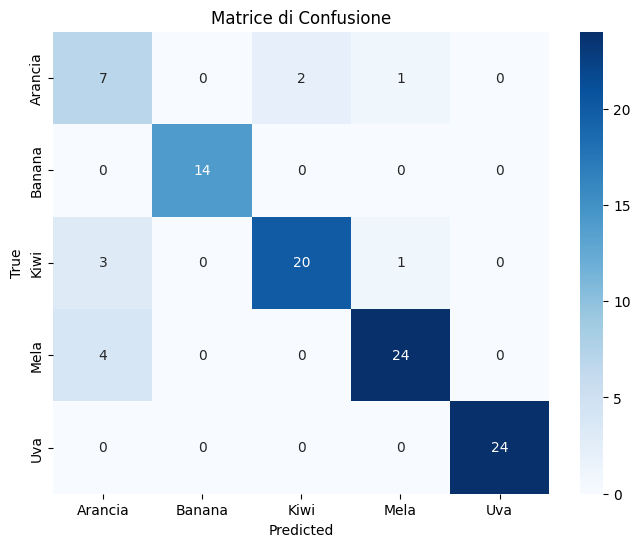

In [ ]:
# GRAFICO DELLA MATRICE DI CONFUSIONE

# Calcolo la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizzo la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_best.classes_, yticklabels=knn_best.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione')
plt.show()


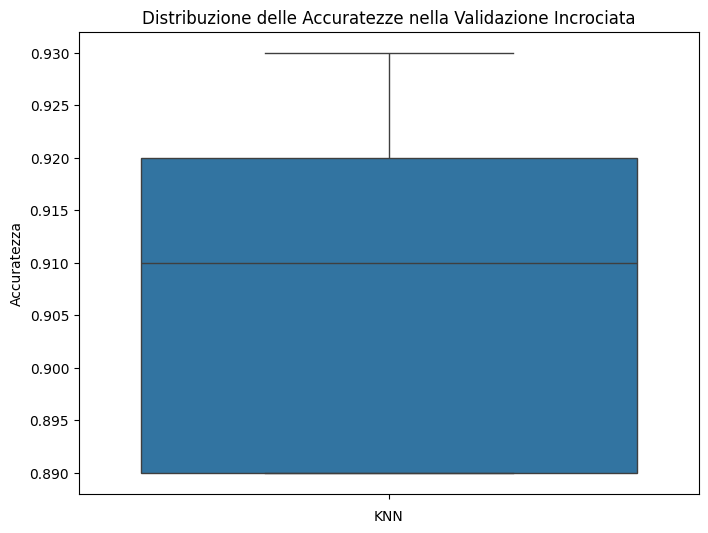

In [ ]:
# GRAFICO DELLE PRECISIONI TRAMITE VALIDAZIONE INCROCIATA

plt.figure(figsize=(8, 6))
sns.boxplot(cv_scores)
plt.title('Distribuzione delle Accuratezze nella Validazione Incrociata')
plt.xlabel('KNN')
plt.ylabel('Accuratezza')
plt.show()

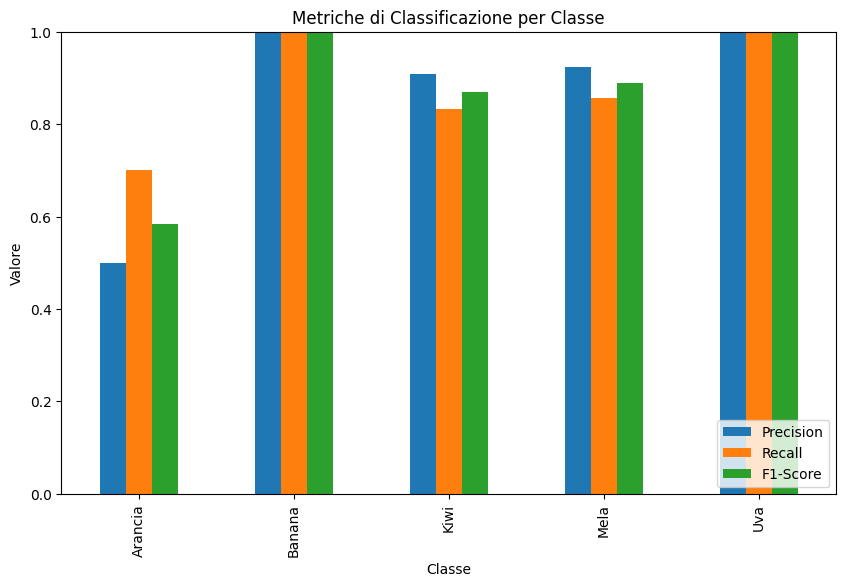

In [ ]:
# GRAFICO DELLE METRICHE DI CLASSIFICAZIONE

# Calcolo precisione, richiamo e F1-score
precisions, recalls, f1s, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=knn_best.classes_)

# Creazione del dataframe per la visualizzazione
metrics_df = pd.DataFrame({
    'Class': knn_best.classes_,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1s
})

# Visualizzazione
metrics_df.set_index('Class').plot(kind='bar', figsize=(10, 6))
plt.title('Metriche di Classificazione per Classe')
plt.xlabel('Classe')
plt.ylabel('Valore')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

### 4.2 ANALISI ED INTERPRETAZIONE DEI RISULTATI PER IDENTIFICARE EVENTUALI AREE DI MIGLIORAMENTO

Accuratezza

Accuratezza sul set di test: 0.89 (89%)
Questo valore indica che il modello classifica correttamente l'89% dei campioni nel set di test. In generale, un'accuratezza di 89% è abbastanza buona, ma dipende dal contesto del problema. Se l'accuratezza richiesta per l'applicazione è più alta, ci potrebbero essere margini di miglioramento.

Matrice di Confusione

La matrice di confusione mostra come i campioni di test sono stati classificati tra le diverse classi.

Analizziamo alcune osservazioni:

Arancia: 7 corretti, 3 errati (2 classificati come Kiwi, 1 come Mela)

La precisione e il richiamo per la classe Arancia sono rispettivamente 0.50 e 0.70. Questo suggerisce che il modello ha difficoltà a distinguere le arance, forse perché le loro caratteristiche si sovrappongono con altre classi come Kiwi e Mela.

Banana: Classificata correttamente al 100%

La precisione e il richiamo sono entrambi 1.00, il che indica che il modello è molto efficace nel riconoscere le banane.

Kiwi: 20 corretti, 4 errati (3 classificati come Arancia, 1 come Mela)

Precisione 0.91, richiamo 0.83. Anche se il modello è abbastanza preciso, c'è un margine di errore nel riconoscere i Kiwi, confondendoli con le Arance e le Mele.

Mela: 24 corretti, 4 errati (tutti classificati come Arancia)

Precisione 0.92, richiamo 0.86. Il modello tende a confondere le Mele con le Arance.

Uva: Classificata correttamente al 100%

Entrambi i valori di precisione e richiamo sono 1.00, indicando un'eccellente capacità di classificazione per l'Uva.


Interpretazione e Possibili Aree di Miglioramento
Confusione tra Arancia, Kiwi e Mela: C'è una chiara sovrapposizione nelle caratteristiche che il modello utilizza per classificare Arancia, Kiwi e Mela.

Potremmo ricorrere al feature Engineering: aggiungere nuove caratteristiche che possano aiutare a distinguere meglio queste classi.

Potremmo anche provare ad aumentare i dati: Se possibile, raccogliere più dati per queste classi specifiche può aiutare il modello a imparare meglio le differenze tra di esse.

Si potrebbe valutare l'uso di modelli più complessi: infatti se l'accuratezza non è soddisfacente per lo scopo prefissato , potremmo considerare l'uso di modelli più complessi come Random Forest o Support Vector Machines, che potrebbero catturare meglio le complessità del dataset.

Bisogna anche considerare il bilanciamento del Dataset: se alcune classi sono significativamente più numerose di altre, potrebbe essere utile bilanciare il dataset per evitare che il modello favorisca le classi più rappresentate.
